# Final Project Report

* Class: DS 5100
* Student Name: Humaid Billoo
* Student Net ID: Ske6pe
* This URL: https://github.com/HumaidB/DS5100_Project/blob/main/DS51200_FinalProject.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd

##########  DIE ##########
class Die:
    ''' Die Class and it has four methods:''' 
    def __init__(self, faces):
        ''' Initializer, it takes a Numpy array and makes sure
        that it is being passed and assures the faces on the die are unique and sets
        the weights to  1.
        Args: faces
        Return: None'''

        # Make sure faces is numpy array
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces is not a NumPy array.")
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Faces are not unique.")
        
        # Values are unique
        self._die = pd.DataFrame({
            "face": faces,
            "weight": np.ones(len(faces))
            }).set_index("face")
        
    def change_weight(self, face, new_weight):
            ''' A method to change the weight of a single side:
            Takes two arguments: the face value to be changed and the new
            weight. Error checks to make sure face is in array and weight is numeric
            Args: face, new_weight
            Return: None'''

            # must be proper name in die
            if face not in self._die.index:
                raise IndexError("Face not in the die.")
            
            # must be numeric
            try:
                new_weight = float(new_weight)
            except ValueError:
                raise TypeError("Weight is not numeric.")
            self._die.loc[face, "weight"] = new_weight

    def roll(self, rolls=1):
        '''A method to roll the die one or more times:
        Takes a parameter of how many times the die is to be rolled
        Args: rolls =1,
        Return outcomes'''
        outcomes = self._die.sample(
            n=rolls,
            replace=True,
            weights=self._die["weight"]
            ).index.tolist()
        return outcomes

    def show(self):
        '''Returns the Die Dataframe
        Args: Self,
        Return:self._die'''
        return self._die


##########  Game    ##########

class Game:
    ''' Game Class and it has four methods:'''

    def __init__(self, dice):
        '''Initializer, Takes a single parameter, a list of already instantiated similar
    dice'''
        self._dice = dice

    def play(self, num_rolls):
        '''Takes an integer parameter to specify how many times the dice should
    be rolled and Saves the result of the play to a data frame
        Args: num_rolls
        Return: None'''
        data = {}
        for i, die in enumerate(self._dice):
            rolls = [die.roll()[0] for j in range(num_rolls)]
            data[i] = rolls
        self._play = pd.DataFrame(data)
        self._play.index.name = "Roll Number"
        
    def show(self, view="wide"):
        '''This method  returns a copy of the  play data frame
        Args: view = wide
        Return: Datfframe'''
        if view == "wide":
            return self._play.copy()
        elif view == "narrow":
            narrow = self._play.stack()
            narrow.index.names = ["Roll Number", "Die Number"]
            narrow.name = "Outcome"
            return narrow.to_frame()
        else:
            raise ValueError("view is not 'wide' or 'narrow'")
        
##########  Analyzer    ##########

class Analyzer:
    '''Takes the results of a single game and computes
various descriptive statistical properties about it, has five methods'''
    def __init__(self, game):
        '''Iniatializer, Takes a game object as its input parameter
        args: game'''
        if not isinstance(game, Game):
            raise ValueError("Input is not a Game object")
        self.game = game
        self.results = game._play

    def jackpot(self):
        '''jackpot is a result in which all faces are the same,
        Computes how many times the game resulted in a jackpot,
        and Returns an integer for the number of jackpots'''
        jackpotcnt = 0
        for roll_number in range(len(self.results)):
            row = self.results.iloc[roll_number]
            first_face = row.iloc[0]
            YNjackpot = True
            for value in row:
                if value != first_face:
                    YNjackpot = False
                    break 
            if YNjackpot:
                jackpotcnt += 1

        return jackpotcnt

    def face_counts_per_roll(self):
        '''Computes how many times a given face is rolled in each even
        and returns data frame of results'''
        allcnt = []
        minface = int(self.results.min().min())
        maxface = int(self.results.max().max())
        for roll_number in range(len(self.results)):
            row = self.results.iloc[roll_number]
            counts = {}
            for face in range(minface, maxface + 1):
                counts[face] = 0
            for value in row:
                counts[value] += 1
            allcnt.append(counts)
        facecnt = pd.DataFrame(allcnt)
        facecnt.index.name = "Roll Number"
        return facecnt

    def combo_count(self):
        '''Computes the distinct combinations of faces rolled, along with their
        counts and returns a data frame of results'''
        lstcombo = []
        for roll_number in range(len(self.results)):
            row = self.results.iloc[roll_number]
            sorted_row = tuple(sorted(row.tolist()))
            lstcombo.append(sorted_row)
        combocnt = {}
        for combo in lstcombo:
            if combo in combocnt:
                combocnt[combo] += 1
            else:
                combocnt[combo] = 1
        combo_df = pd.DataFrame.from_dict(combocnt, orient="index", columns=["Count"])
        multi_index = pd.MultiIndex.from_tuples(combo_df.index, names=["Die {i+1}" for i in range(len(self.results.columns))])
        combo_df.index = multi_index
        return(combo_df)

    def permutation_counts(self):
        ''' Computes the distinct permutations of faces rolled, along with their
        counts and returns a data frame of results'''
        perms_list = []
        for roll_number in range(len(self.results)):
            row = self.results.iloc[roll_number]
            row_tuple = tuple(row.tolist())
            perms_list.append(row_tuple)
        cntperm = {}
        for perm in perms_list:
            if perm in cntperm:
                cntperm[perm] += 1
            else:
                cntperm[perm] = 1

        perm_df = pd.DataFrame.from_dict(cntperm, orient="index", columns=["Count"])
        multi_index = pd.MultiIndex.from_tuples(perm_df.index, names=["Die {i+1}" for i in range(len(self.results.columns))])
        perm_df.index = multi_index

        return perm_df
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
from montecarlo import Die, Game, Analyzer

class TestDie(unittest.TestCase):
    # Die Class Tester
    def setUp(self):
        self.faces = np.array([1, 2])
        self.die = Die(self.faces)

    def test_invalids_type(self):
        #checks invaled input
        with self.assertRaises(TypeError):
            Die(['a','b','c','d','e','f'])

    def test_change_weight(self):
        # test change weight
        self.die.change_weight(2, 5)
        weight = self.die.show().loc[2, "weight"]
        self.assertEqual(weight, 5)

    def test_roll(self):
        # Testing valid roll outcomes
        result = self.die.roll(10)
        self.assertEqual(len(result), 10)

    def test_show(self):
        # Check datagrame correct columns
        result = self.die.show()
        self.assertIn("weight", result.columns)

class TestGame(unittest.TestCase):
    # Game Class Tester
    def setUp(self):
        # Game Setup
        die1 = Die(np.array([1, 2]))
        die2 = Die(np.array([1, 2]))
        self.game = Game([die1, die2])
        self.game.play(5)

    def test_play(self):
        # Check if the results have correct shape
        result = self.game._play
        self.assertEqual(result.shape, (5, 2))
    def test_show(self):
        # Check shows wide and narroe
        wide = self.game.show("wide")
        narrow = self.game.show("narrow")
        self.assertEqual(wide.shape, (5, 2))
        self.assertEqual(len(narrow), 10)

class TestAnalyzer(unittest.TestCase):
    # Analyzer Class Tester
    def setUp(self):
        die1 = Die(np.array([1, 2]))
        die2 = Die(np.array([1, 2]))
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_jackpot(self):
        # checks is jackpot is integer
        result = self.analyzer.jackpot()
        self.assertIsInstance(result, int)

    def test_face_counts_per_roll(self):
        # Checks face counts
        df = self.analyzer.face_counts_per_roll()
        self.assertEqual(df.shape[0], 10)

    def test_combo_count(self):
        # checks combo counts output shape
        df = self.analyzer.combo_count()
        self.assertEqual(df.shape[1], 1)
        self.assertIn("Count", df.columns)

    def test_permutation_counts(self):
        # Checks permutation_counts shape
        df = self.analyzer.permutation_counts()
        self.assertEqual(df.shape[1], 1)
        self.assertIn("Count", df.columns)

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [92]:
import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [93]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Takes the results of a single game and computes
     |  various descriptive statistical properties about it, has five methods
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Iniatializer, Takes a game object as its input parameter
     |      args: game
     |  
     |  combo_count(self)
     |      Computes the distinct combinations of faces rolled, along with their
     |      counts and returns a data frame of results
     |  
     |  face_counts_per_roll(self)
     |      Computes how many times a given face is rolled in each even
     |      and returns data frame of results
     |  
     |  jackpot(self)
     |      jackpot is a result in which all faces are the same,
     |      Computes how many times the game resulted in a jackpot,
     |  

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/HumaidB/DS5100_Project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [94]:
import numpy as np
from montecarlo import Die, Game, Analyzer

fair = Die(np.array(['H', 'T']))

unfair = Die(np.array(['H', 'T']))
unfair.change_weight('H', 5)

print("Fair created:")
print(fair.show())

print("Unfair created:")
print(unfair.show())




Fair created:
      weight
face        
H        1.0
T        1.0
Unfair created:
      weight
face        
H        5.0
T        1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [95]:
game1 = Game([fair, fair])
game1.play(1000) 
print(game1.show())

             0  1
Roll Number      
0            T  H
1            H  H
2            H  T
3            T  H
4            H  T
...         .. ..
995          H  H
996          T  T
997          H  T
998          T  T
999          H  H

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [96]:
game2=Game([fair,unfair,unfair])
game2.play(1000)
print(game2.show())

             0  1  2
Roll Number         
0            H  H  H
1            H  H  H
2            H  H  T
3            T  H  T
4            H  H  H
...         .. .. ..
995          H  H  H
996          T  H  T
997          H  H  H
998          T  T  H
999          T  H  H

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [97]:
an1 = Analyzer(game1)
an2 = Analyzer(game2)

jackpot_game1 = an1.jackpot()
jackpot_game2 = an2.jackpot()

print("Jackpots for Game 1:", jackpot_game1)
print("Jackpots for Game 2:", jackpot_game2)

Jackpots for Game 1: 489
Jackpots for Game 2: 356


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [98]:
print("Relative frequency for Game 1:",an1.jackpot() / len(game1.show()),"\nRelative frequency for Game 2:", an2.jackpot() / len(game2.show()))

Relative frequency for Game 1: 0.489 
Relative frequency for Game 2: 0.356


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Jackpot Frequency by Game')

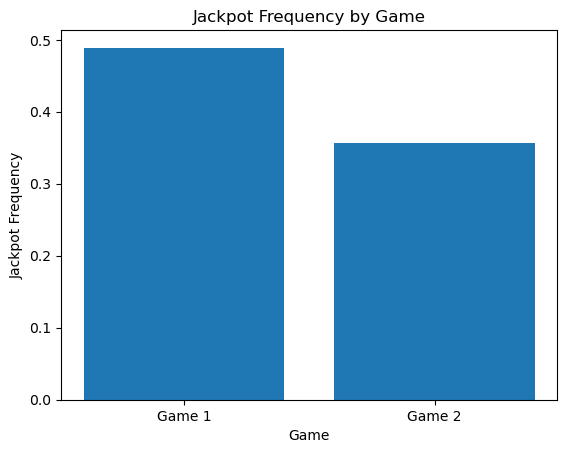

In [99]:
import matplotlib.pyplot as plt
rel1f = an1.jackpot() / len(game1.show())
rel2f = an2.jackpot() / len(game2.show())
Freq = [rel1f,rel2f]
games=['Game 1', 'Game 2']
plt.bar(games,Freq)
plt.xlabel("Game")
plt.ylabel("Jackpot Frequency")
plt.title("Jackpot Frequency by Game")

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [100]:
dieFace = np.array([1, 2, 3, 4, 5, 6])
die1 = Die(die_face)
die2 = Die(die_face)
die3 = Die(die_face)

print(die1.show(),die2.show(),die3.show())


      weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [101]:
die1.change_weight(6,5) 
die1.show()

,weight
face,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [102]:
die2.change_weight(1,5) 
die2.show()

,weight
face,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [103]:
Game1 = Game([die3, die3, die3, die3, die3])
Game1.play(10000) 
Game1.show()

,0,1,2,3,4
Roll Number,,,,,
0,3,4,5,1,4
1,4,2,2,5,6
2,4,6,4,5,6
3,4,3,4,1,3
4,5,6,1,5,6
...,...,...,...,...,...
9995,6,4,3,5,6
9996,3,4,5,3,3
9997,4,2,1,6,4


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [104]:
Game2 = Game([die1, die2, die3, die3, die3])
Game2.play(10000) 
Game2.show()

,0,1,2,3,4
Roll Number,,,,,
0,6,2,5,3,4
1,6,4,3,5,3
2,4,1,3,3,1
3,6,5,1,4,1
4,1,1,5,3,2
...,...,...,...,...,...
9995,2,1,3,6,1
9996,6,1,6,6,6
9997,3,1,4,6,2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0.5, 1.0, 'Jackpot Frequency by Game')

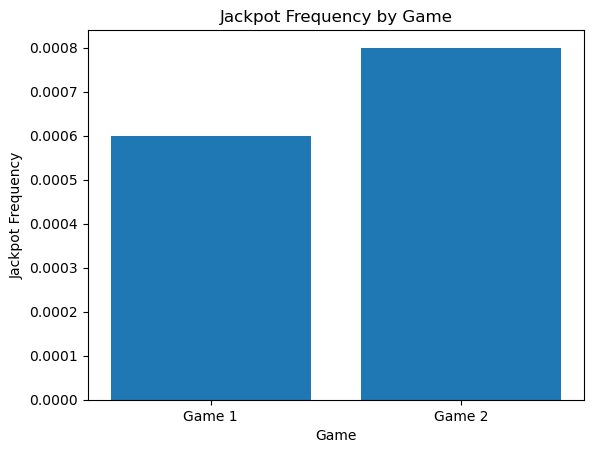

In [105]:
ana1 = Analyzer(Game1)
ana2 = Analyzer(Game2)


game1Freq = ana1.jackpot() / len(Game1.show())
game2Freq = ana2.jackpot() / len(Game2.show())

plt.bar(games,[game1Freq,game2Freq]) 
plt.xlabel("Game")
plt.ylabel("Jackpot Frequency") 
plt.title("Jackpot Frequency by Game")

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [106]:
import pandas as pd

letters=pd.read_csv('/Users/humaidper/Desktop/UVA MSDS/DS 5100/ProjectDs5100/ds5100_final_project_files/english_letters.txt',sep='\s+')

faceLetters = letters.iloc[:,0].values

dieLetters = Die(faceLetters)

for row in letters.itertuples(index=False, name=None):
    dieLetters.change_weight(row[0], row[1])

print(dieInit.show())

           weight
face             
T     390965105.0
A     374061888.0
O     326627740.0
I     320410057.0
N     313720540.0
S     294300210.0
R     277000841.0
H     216768975.0
L     183996130.0
D     169330528.0
C     138416451.0
U     117295780.0
M     110504544.0
F      95422055.0
G      91258980.0
P      90376747.0
W      79843664.0
Y      75294515.0
B      70195826.0
V      46337161.0
K      35373464.0
J       9613410.0
X       8369915.0
Z       4975847.0
Q       4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [107]:
dieLettersG1 =Game([dieLetters,dieLetters,dieLetters,dieLetters]) 
dieLettersG1.play(1000)
dieLettersG1.show()

,0,1,2,3
Roll Number,,,,
0,B,T,N,T
1,D,M,I,A
2,T,C,B,I
3,C,N,C,I
4,B,F,N,R
...,...,...,...,...
995,I,S,H,T
996,S,I,I,I
997,A,T,R,T


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [108]:
with open('/Users/humaidper/Desktop/UVA MSDS/DS 5100/ProjectDs5100/ds5100_final_project_files/scrabble_words.txt', 'r') as file:
    mainWords = file.read().splitlines()
    
analy = Analyzer(dieLettersG1)
permuts = analy.permutation_counts().index.tolist()
words1 = [''.join(p) for p in permuts]
fourLetWord = len(set(mainWords).intersection(set(words1)))
print(fourLetWord)

30


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [109]:
dieLettersG2 =Game([dieLetters,dieLetters,dieLetters,dieLetters,dieLetters]) 
dieLettersG2.play(1000)
analy = Analyzer(dieLettersG2)
permuts = analy.permutation_counts().index.tolist()
words2 = [''.join(p) for p in permuts]
fourLetWord5 = len(set(mainWords).intersection(set(words2)))
print("5 dice produces",fourLetWord5,"words")
if fourLetWord5 > fourLetWord:
    print("\n5 Dice produces more words")
elif fourLetWord5 == fourLetWord:
    print("\n5 and 4 Dice produces same amount of words")
else:
    print("\n4 Dice produces more words")

5 dice produces 3 words

4 Dice produces more words
